###### Random Forest

In [13]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mnist import MNIST
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from keras.layers import Input, Dense
from keras.models import Model
import time
import scikitplot as skplt
from sklearn.metrics import classification_report

## Loading Data

In [0]:
mndata = MNIST('C:\\University\\Machine learning\\Ass_2\\Sample Data')
images, labels = mndata.load_training()
test_images, test_labels = mndata.load_testing()
images= np.asarray(images)
labels= np.asarray(labels)
test_images = np.asarray(test_images)
test_labels = np.asarray(test_labels)

## Data Preprocessing

In [0]:
def data_pre_process(x, xtest, n_components = 120):
  # Zero centering and Normalization
  x = x.astype('float64')
  x -= np.mean(x, axis = 0)
  xtest = xtest.astype('float64')
  xtest -= np.mean(test_images, axis = 0)
  x /= 255
  xtest /= 255
  if(n_components != -1):
    pca = PCA(n_components= n_components)
    x =  pca.fit_transform(x)
    xtest =  pca.transform(xtest)
  return x, xtest

# Random Forest 

In [0]:
def rand_forest_fit(x, y, n_estimators =10, val=0.2 ):
  start_time=time.time()
  classifier= RFC(n_estimators = n_estimators)
  x, x_val, y, y_val= train_test_split(x, y, test_size = val)
  classifier.fit(x, y)
  y_pred= classifier.predict(x_val)
  A_score = accuracy_score(y_val, y_pred)
  print("The accuracy of Random forest with default params over validation data is" ,A_score)
  print("Running time: "+ str(int(time.time()-start_time))+" seconds")
  return classifier

### Random Forest with 10 trees

In [7]:
x_red, x_test_red = data_pre_process(images, test_images, 120)
classifier = rand_forest_fit(x_red, labels, 10, 0.2)
y_pred_test= classifier.predict(x_test_red)
A_score2 = accuracy_score(test_labels, y_pred_test)
print("The accuracy of Random forest over test data is" ,A_score2)

The accuracy of Random forest with default params over validation data is 0.8263333333333334
Running time: 7 seconds
The accuracy of Random forest over test data is 0.8211


### Random Forest with 100 trees

In [15]:
x_red, x_test_red = data_pre_process(images, test_images, 120)
classifier = rand_forest_fit(x_red, labels, 100, 0.2)
y_pred_test= classifier.predict(x_test_red)
y_proba_test= classifier.predict_proba(x_test_red)
A_score2 = accuracy_score(test_labels, y_pred_test)
print("The accuracy of Random forest over test data is" ,A_score2)

The accuracy of Random forest with default params over validation data is 0.869
Running time: 69 seconds
The accuracy of Random forest over test data is 0.8568


### Random Forest with 300 trees

In [10]:
x_red, x_test_red = data_pre_process(images, test_images, 120)
classifier = rand_forest_fit(x_red, labels, 300, 0.2)
y_pred_test= classifier.predict(x_test_red)
A_score2 = accuracy_score(test_labels, y_pred_test)
print("The accuracy of Random forest over test data is" ,A_score2)

The accuracy of Random forest with default params over validation data is 0.8635
Running time: 215 seconds
The accuracy of Random forest over test data is 0.8598


### Random Forest with 500 trees

In [9]:
x_red, x_test_red = data_pre_process(images, test_images, 120)
classifier = rand_forest_fit(x_red, labels, 500, 0.2)
y_pred_test= classifier.predict(x_test_red)
A_score2 = accuracy_score(test_labels, y_pred_test)
print("The accuracy of Random forest over test data is" ,A_score2)

The accuracy of Random forest with default params over validation data is 0.86825
Running time: 360 seconds
The accuracy of Random forest over test data is 0.8631


**Random Forest with 1000 trees**

In [11]:
x_red, x_test_red = data_pre_process(images, test_images, 120)
classifier = rand_forest_fit(x_red, labels, 1000, 0.2)
y_pred_test= classifier.predict(x_test_red)
A_score2 = accuracy_score(test_labels, y_pred_test)
print("The accuracy of Random forest over test data is" ,A_score2)

The accuracy of Random forest with default params over validation data is 0.867
Running time: 711 seconds
The accuracy of Random forest over test data is 0.8624


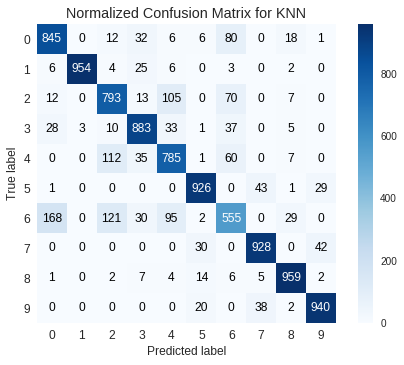

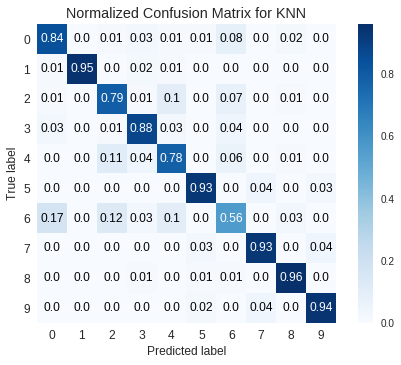

             precision    recall  f1-score   support

          0       0.80      0.84      0.82      1000
          1       1.00      0.95      0.97      1000
          2       0.75      0.79      0.77      1000
          3       0.86      0.88      0.87      1000
          4       0.76      0.79      0.77      1000
          5       0.93      0.93      0.93      1000
          6       0.68      0.56      0.61      1000
          7       0.92      0.93      0.92      1000
          8       0.93      0.96      0.94      1000
          9       0.93      0.94      0.93      1000

avg / total       0.85      0.86      0.85     10000



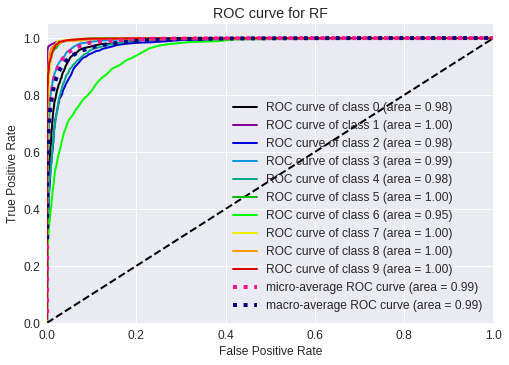

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


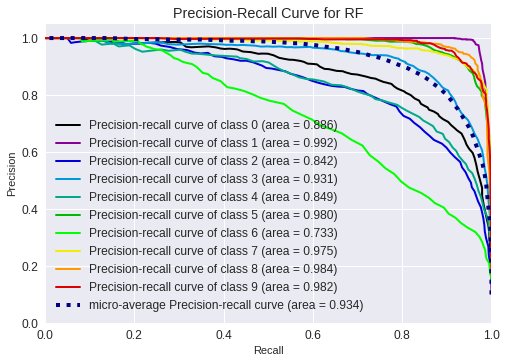

In [16]:
# confusion matrix
skplt.metrics.plot_confusion_matrix(test_labels, y_pred_test, title='Normalized Confusion Matrix for KNN')
plt.show()

# normalized confusion matrix
skplt.metrics.plot_confusion_matrix(test_labels, y_pred_test, title='Normalized Confusion Matrix for KNN', normalize=True)
plt.show()

#Metrics: Precision, Recall, F1-score, Support
print(classification_report(test_labels, y_pred_test))

#ROC Curve
skplt.metrics.plot_roc(test_labels, y_proba_test, title='ROC curve for RF')
plt.show()

#Precision_Recall Curve
skplt.metrics.plot_precision_recall_curve(test_labels, y_proba_test, title = 'Precision-Recall Curve for RF')
plt.show()